In [49]:
!pip install tensorflow==2.0.0-alpha0

You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [50]:
#%load_ext tensorboard.notebook
#%tensorboard --logdir logs

In [51]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer
from sklearn.metrics import r2_score


## regression with embedings

In [52]:
df = pd.read_csv('../input/jobsch2/jobcloud_clean.csv', delimiter = ';', parse_dates = ['start_dt', 'end_dt'])
dfv = pd.read_csv('../input/jobsch2/doc2vec50.csv', index_col='Unnamed: 0')
dfp = pd.read_csv('../input/jobsch3/postal_codes.csv')
dff = pd.read_csv('../input/jobsch3/jobcloud_features.csv', delimiter = ';')

In [53]:
dff.shape

(101735, 30)

In [54]:
dff.head()

,id,start_dt,end_dt,1d_view_cnt,10d_view_cnt,30d_view_cnt,package_id,industry_name,job_location,job_postal_code,contract_pct_from,contract_pct_to,title,month,weekday,dayofyear,days_online,pct_range,city,title_num_words,title_aggressive,title_female,title_percent,title_location,title_diploma,title_chief,title_prob_en,title_prob_de,title_prob_fr,title_lang
0,8501672,2018-10-25,2018-11-26,0.2372,0.4565,0.7327,B,Industrie diverse,Espace Mittelland,NaN,100,100,Softwarearchitekt / Projektmanager (m/w) - All...,October,Thursday,298,32,0,Other,12,0,1,0,0,0,0,0.0,0.999994,0.0,de
1,8501682,2018-10-25,2018-11-26,0.2883,0.5826,1.0991,B,Maschinen-/Anlagenbau,Region Biel,NaN,100,100,Prozessingenieur Lasertechnologie - Industrial...,October,Thursday,298,32,0,Other,6,0,0,0,0,0,0,0.0,0.999996,0.0,de
2,8570830,2018-11-26,2018-12-28,0.1982,0.8468,1.1532,B,Industrie diverse,Espace Mittelland,NaN,100,100,Softwarearchitekt / Projektmanager (m/w) - All...,November,Monday,330,32,0,Other,12,0,1,0,0,0,0,0.0,0.999994,0.0,de
3,8649301,2019-01-08,2019-02-08,0.2883,0.7177,1.4835,B,Maschinen-/Anlagenbau,Espace Mittelland,NaN,100,100,Projektleiter (m/w) - Werkzeug- oder Maschinenbau,January,Tuesday,8,31,0,Other,6,0,1,0,0,0,0,0.0,0.999995,0.0,de
4,8730602,2019-02-12,2019-02-21,0.3574,0.7297,0.7297,B,Industrie diverse,Region Biel,NaN,100,100,Fachverantwortlichen Metrologie - Produkteentw...,February,Tuesday,43,9,0,Other,6,0,0,0,0,0,0,0.0,0.999997,0.0,de


In [55]:
dfv.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,0.083024,0.119868,-0.085458,0.105985,-0.018880,-0.139865,-0.015550,-0.064974,-0.296612,0.033869,0.381901,0.015851,-0.086753,-0.258003,-0.085994,0.250018,-0.126835,0.227049,0.008411,-0.127485,-0.108856,0.011194,0.035064,-0.050789,0.023203,0.025601,-0.148949,-0.111761,-0.047376,0.158222,0.031387,-0.109000,-0.146389,0.031296,0.070576,0.093544,-0.049862,0.153027,0.104450,0.069029,0.106543,0.097097,0.010954,0.009600,-0.362335,0.003787,0.103229,0.175627,-0.006176,-0.141066
1,0.045423,-0.038487,0.036288,0.096645,-0.010240,-0.102352,-0.088963,-0.084718,-0.156712,-0.012331,0.291868,0.015802,-0.166864,-0.155277,-0.076071,0.191853,-0.000947,0.123151,-0.013927,-0.117406,-0.086065,-0.018351,-0.012022,-0.011926,0.015033,-0.075034,-0.149068,-0.121037,-0.033547,0.065656,0.053305,-0.000138,-0.033526,-0.072722,0.023101,0.031567,0.086987,0.100868,0.017521,0.028278,0.050656,0.060489,0.003695,-0.032683,-0.164969,0.018936,0.044828,0.066804,-0.076640,-0.115642
2,-0.014609,0.001341,-0.012823,0.063366,-0.075904,-0.136570,-0.004783,-0.119062,-0.305384,0.082750,0.377060,-0.008688,-0.154610,-0.250703,-0.044228,0.266528,-0.055715,0.202790,0.006051,-0.094139,-0.046906,0.031646,0.168662,-0.034768,-0.057406,-0.069315,-0.182722,-0.079912,0.035916,0.171432,0.051335,-0.227106,-0.202598,0.040380,0.053569,0.080577,0.015827,0.151769,0.102704,0.119210,0.052998,0.045949,0.004434,-0.014584,-0.326960,-0.023166,0.167030,0.145468,0.044529,-0.033895
3,0.026409,0.068298,-0.016075,0.116948,-0.022921,-0.100031,0.019729,-0.074308,-0.180375,0.012577,0.209239,0.010931,-0.099572,-0.167973,-0.096399,0.122700,-0.067672,0.153275,0.019348,-0.097114,0.001854,0.021723,0.041614,0.002366,0.046129,0.049169,-0.043754,-0.130262,-0.019157,0.071290,0.004099,-0.013779,-0.054943,0.039286,0.008784,0.037882,0.050629,0.124902,0.012526,0.055445,0.054283,-0.019924,0.047615,-0.029599,-0.185109,-0.019131,0.088486,0.086778,-0.013281,-0.058467
4,0.023438,0.034685,-0.030301,0.055387,-0.035706,-0.013062,-0.008415,0.001732,-0.056751,-0.035711,0.092215,0.020212,-0.011533,-0.065425,-0.053683,0.078858,0.002039,0.037126,0.006936,-0.025791,-0.055190,0.021215,-0.022946,-0.009137,0.015750,-0.020554,-0.094846,-0.041711,-0.001494,0.019895,0.024663,-0.045260,-0.006030,-0.007325,0.024836,-0.015729,-0.022507,0.038196,0.032938,-0.028980,0.051503,0.085128,0.004476,0.059645,-0.059488,0.004252,0.013402,0.034101,-0.050480,-0.026922


In [56]:
dfv.shape

(101735, 50)

In [57]:
df = pd.concat([df, dfv], axis = 1)

In [58]:
df.shape

(101735, 63)

In [59]:
print(tf.__version__)

2.0.0-alpha0


In [60]:
df.head()

,id,start_dt,end_dt,1d_view_cnt,10d_view_cnt,30d_view_cnt,package_id,industry_name,job_location,job_postal_code,contract_pct_from,contract_pct_to,title,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,8501672,2018-10-25,2018-11-26,0.2372,0.4565,0.7327,B,Industrie diverse,Espace Mittelland,NaN,100,100,Softwarearchitekt / Projektmanager (m/w) - All...,0.083024,0.119868,-0.085458,0.105985,-0.018880,-0.139865,-0.015550,-0.064974,-0.296612,0.033869,0.381901,0.015851,-0.086753,-0.258003,-0.085994,0.250018,-0.126835,0.227049,0.008411,-0.127485,-0.108856,0.011194,0.035064,-0.050789,0.023203,0.025601,-0.148949,-0.111761,-0.047376,0.158222,0.031387,-0.109000,-0.146389,0.031296,0.070576,0.093544,-0.049862,0.153027,0.104450,0.069029,0.106543,0.097097,0.010954,0.009600,-0.362335,0.003787,0.103229,0.175627,-0.006176,-0.141066
1,8501682,2018-10-25,2018-11-26,0.2883,0.5826,1.0991,B,Maschinen-/Anlagenbau,Region Biel,NaN,100,100,Prozessingenieur Lasertechnologie - Industrial...,0.045423,-0.038487,0.036288,0.096645,-0.010240,-0.102352,-0.088963,-0.084718,-0.156712,-0.012331,0.291868,0.015802,-0.166864,-0.155277,-0.076071,0.191853,-0.000947,0.123151,-0.013927,-0.117406,-0.086065,-0.018351,-0.012022,-0.011926,0.015033,-0.075034,-0.149068,-0.121037,-0.033547,0.065656,0.053305,-0.000138,-0.033526,-0.072722,0.023101,0.031567,0.086987,0.100868,0.017521,0.028278,0.050656,0.060489,0.003695,-0.032683,-0.164969,0.018936,0.044828,0.066804,-0.076640,-0.115642
2,8570830,2018-11-26,2018-12-28,0.1982,0.8468,1.1532,B,Industrie diverse,Espace Mittelland,NaN,100,100,Softwarearchitekt / Projektmanager (m/w) - All...,-0.014609,0.001341,-0.012823,0.063366,-0.075904,-0.136570,-0.004783,-0.119062,-0.305384,0.082750,0.377060,-0.008688,-0.154610,-0.250703,-0.044228,0.266528,-0.055715,0.202790,0.006051,-0.094139,-0.046906,0.031646,0.168662,-0.034768,-0.057406,-0.069315,-0.182722,-0.079912,0.035916,0.171432,0.051335,-0.227106,-0.202598,0.040380,0.053569,0.080577,0.015827,0.151769,0.102704,0.119210,0.052998,0.045949,0.004434,-0.014584,-0.326960,-0.023166,0.167030,0.145468,0.044529,-0.033895
3,8649301,2019-01-08,2019-02-08,0.2883,0.7177,1.4835,B,Maschinen-/Anlagenbau,Espace Mittelland,NaN,100,100,Projektleiter (m/w) - Werkzeug- oder Maschinenbau,0.026409,0.068298,-0.016075,0.116948,-0.022921,-0.100031,0.019729,-0.074308,-0.180375,0.012577,0.209239,0.010931,-0.099572,-0.167973,-0.096399,0.122700,-0.067672,0.153275,0.019348,-0.097114,0.001854,0.021723,0.041614,0.002366,0.046129,0.049169,-0.043754,-0.130262,-0.019157,0.071290,0.004099,-0.013779,-0.054943,0.039286,0.008784,0.037882,0.050629,0.124902,0.012526,0.055445,0.054283,-0.019924,0.047615,-0.029599,-0.185109,-0.019131,0.088486,0.086778,-0.013281,-0.058467
4,8730602,2019-02-12,2019-02-21,0.3574,0.7297,0.7297,B,Industrie diverse,Region Biel,NaN,100,100,Fachverantwortlichen Metrologie - Produkteentw...,0.023438,0.034685,-0.030301,0.055387,-0.035706,-0.013062,-0.008415,0.001732,-0.056751,-0.035711,0.092215,0.020212,-0.011533,-0.065425,-0.053683,0.078858,0.002039,0.037126,0.006936,-0.025791,-0.055190,0.021215,-0.022946,-0.009137,0.015750,-0.020554,-0.094846,-0.041711,-0.001494,0.019895,0.024663,-0.045260,-0.006030,-0.007325,0.024836,-0.015729,-0.022507,0.038196,0.032938,-0.028980,0.051503,0.085128,0.004476,0.059645,-0.059488,0.004252,0.013402,0.034101,-0.050480,-0.026922


In [61]:
df['days'] = (df['end_dt'] - df['start_dt']).dt.days
df = df.loc[df['days'] >= 30, :]

In [62]:
df.head()

,id,start_dt,end_dt,1d_view_cnt,10d_view_cnt,30d_view_cnt,package_id,industry_name,job_location,job_postal_code,contract_pct_from,contract_pct_to,title,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,days
0,8501672,2018-10-25,2018-11-26,0.2372,0.4565,0.7327,B,Industrie diverse,Espace Mittelland,NaN,100,100,Softwarearchitekt / Projektmanager (m/w) - All...,0.083024,0.119868,-0.085458,0.105985,-0.018880,-0.139865,-0.015550,-0.064974,-0.296612,0.033869,0.381901,0.015851,-0.086753,-0.258003,-0.085994,0.250018,-0.126835,0.227049,0.008411,-0.127485,-0.108856,0.011194,0.035064,-0.050789,0.023203,0.025601,-0.148949,-0.111761,-0.047376,0.158222,0.031387,-0.109000,-0.146389,0.031296,0.070576,0.093544,-0.049862,0.153027,0.104450,0.069029,0.106543,0.097097,0.010954,0.009600,-0.362335,0.003787,0.103229,0.175627,-0.006176,-0.141066,32
1,8501682,2018-10-25,2018-11-26,0.2883,0.5826,1.0991,B,Maschinen-/Anlagenbau,Region Biel,NaN,100,100,Prozessingenieur Lasertechnologie - Industrial...,0.045423,-0.038487,0.036288,0.096645,-0.010240,-0.102352,-0.088963,-0.084718,-0.156712,-0.012331,0.291868,0.015802,-0.166864,-0.155277,-0.076071,0.191853,-0.000947,0.123151,-0.013927,-0.117406,-0.086065,-0.018351,-0.012022,-0.011926,0.015033,-0.075034,-0.149068,-0.121037,-0.033547,0.065656,0.053305,-0.000138,-0.033526,-0.072722,0.023101,0.031567,0.086987,0.100868,0.017521,0.028278,0.050656,0.060489,0.003695,-0.032683,-0.164969,0.018936,0.044828,0.066804,-0.076640,-0.115642,32
2,8570830,2018-11-26,2018-12-28,0.1982,0.8468,1.1532,B,Industrie diverse,Espace Mittelland,NaN,100,100,Softwarearchitekt / Projektmanager (m/w) - All...,-0.014609,0.001341,-0.012823,0.063366,-0.075904,-0.136570,-0.004783,-0.119062,-0.305384,0.082750,0.377060,-0.008688,-0.154610,-0.250703,-0.044228,0.266528,-0.055715,0.202790,0.006051,-0.094139,-0.046906,0.031646,0.168662,-0.034768,-0.057406,-0.069315,-0.182722,-0.079912,0.035916,0.171432,0.051335,-0.227106,-0.202598,0.040380,0.053569,0.080577,0.015827,0.151769,0.102704,0.119210,0.052998,0.045949,0.004434,-0.014584,-0.326960,-0.023166,0.167030,0.145468,0.044529,-0.033895,32
3,8649301,2019-01-08,2019-02-08,0.2883,0.7177,1.4835,B,Maschinen-/Anlagenbau,Espace Mittelland,NaN,100,100,Projektleiter (m/w) - Werkzeug- oder Maschinenbau,0.026409,0.068298,-0.016075,0.116948,-0.022921,-0.100031,0.019729,-0.074308,-0.180375,0.012577,0.209239,0.010931,-0.099572,-0.167973,-0.096399,0.122700,-0.067672,0.153275,0.019348,-0.097114,0.001854,0.021723,0.041614,0.002366,0.046129,0.049169,-0.043754,-0.130262,-0.019157,0.071290,0.004099,-0.013779,-0.054943,0.039286,0.008784,0.037882,0.050629,0.124902,0.012526,0.055445,0.054283,-0.019924,0.047615,-0.029599,-0.185109,-0.019131,0.088486,0.086778,-0.013281,-0.058467,31
5,8737153,2019-02-14,2019-03-18,0.6456,1.3604,2.4144,B,Industrie diverse,Region Biel,NaN,100,100,Regional Sales / Key Account Manager - Integri...,-0.037783,-0.055327,-0.003177,0.098941,0.032716,-0.050805,-0.052610,-0.081688,-0.255370,0.024983,0.328340,0.015382,-0.163888,-0.194063,-0.051757,0.243255,-0.069649,0.168286,-0.065797,-0.060434,-0.000811,-0.038101,0.133952,-0.072980,-0.055218,-0.004120,-0.109627,-0.108130,0.039472,0.188370,0.044156,-0.066910,-0.097212,-0.058514,-0.009829,0.091681,0.018819,0.150035,0.085899,0.000727,0.057269,0.034761,0.005852,-0.082834,-0.299501,0.082885,0.038977,0.115399,0.057288,-0.032665,32


In [63]:
df = df.iloc[:, [5] + list(range(13, 63))]; df.head()

,30d_view_cnt,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,0.7327,0.083024,0.119868,-0.085458,0.105985,-0.018880,-0.139865,-0.015550,-0.064974,-0.296612,0.033869,0.381901,0.015851,-0.086753,-0.258003,-0.085994,0.250018,-0.126835,0.227049,0.008411,-0.127485,-0.108856,0.011194,0.035064,-0.050789,0.023203,0.025601,-0.148949,-0.111761,-0.047376,0.158222,0.031387,-0.109000,-0.146389,0.031296,0.070576,0.093544,-0.049862,0.153027,0.104450,0.069029,0.106543,0.097097,0.010954,0.009600,-0.362335,0.003787,0.103229,0.175627,-0.006176,-0.141066
1,1.0991,0.045423,-0.038487,0.036288,0.096645,-0.010240,-0.102352,-0.088963,-0.084718,-0.156712,-0.012331,0.291868,0.015802,-0.166864,-0.155277,-0.076071,0.191853,-0.000947,0.123151,-0.013927,-0.117406,-0.086065,-0.018351,-0.012022,-0.011926,0.015033,-0.075034,-0.149068,-0.121037,-0.033547,0.065656,0.053305,-0.000138,-0.033526,-0.072722,0.023101,0.031567,0.086987,0.100868,0.017521,0.028278,0.050656,0.060489,0.003695,-0.032683,-0.164969,0.018936,0.044828,0.066804,-0.076640,-0.115642
2,1.1532,-0.014609,0.001341,-0.012823,0.063366,-0.075904,-0.136570,-0.004783,-0.119062,-0.305384,0.082750,0.377060,-0.008688,-0.154610,-0.250703,-0.044228,0.266528,-0.055715,0.202790,0.006051,-0.094139,-0.046906,0.031646,0.168662,-0.034768,-0.057406,-0.069315,-0.182722,-0.079912,0.035916,0.171432,0.051335,-0.227106,-0.202598,0.040380,0.053569,0.080577,0.015827,0.151769,0.102704,0.119210,0.052998,0.045949,0.004434,-0.014584,-0.326960,-0.023166,0.167030,0.145468,0.044529,-0.033895
3,1.4835,0.026409,0.068298,-0.016075,0.116948,-0.022921,-0.100031,0.019729,-0.074308,-0.180375,0.012577,0.209239,0.010931,-0.099572,-0.167973,-0.096399,0.122700,-0.067672,0.153275,0.019348,-0.097114,0.001854,0.021723,0.041614,0.002366,0.046129,0.049169,-0.043754,-0.130262,-0.019157,0.071290,0.004099,-0.013779,-0.054943,0.039286,0.008784,0.037882,0.050629,0.124902,0.012526,0.055445,0.054283,-0.019924,0.047615,-0.029599,-0.185109,-0.019131,0.088486,0.086778,-0.013281,-0.058467
5,2.4144,-0.037783,-0.055327,-0.003177,0.098941,0.032716,-0.050805,-0.052610,-0.081688,-0.255370,0.024983,0.328340,0.015382,-0.163888,-0.194063,-0.051757,0.243255,-0.069649,0.168286,-0.065797,-0.060434,-0.000811,-0.038101,0.133952,-0.072980,-0.055218,-0.004120,-0.109627,-0.108130,0.039472,0.188370,0.044156,-0.066910,-0.097212,-0.058514,-0.009829,0.091681,0.018819,0.150035,0.085899,0.000727,0.057269,0.034761,0.005852,-0.082834,-0.299501,0.082885,0.038977,0.115399,0.057288,-0.032665


In [64]:
#data = tf.keras.datasets.boston_housing

In [65]:
#(x_train, y_train),(x_test, y_test) = data.load_data()

In [66]:
#df.iloc[:, 0].head()

In [67]:
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, 1:], df.iloc[:,0], test_size = 0.3, random_state = 42)

In [68]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((24599, 50), (24599,), (10543, 50), (10543,))

In [69]:
x_train = tf.keras.utils.normalize(x_train.values)
#y_train = tf.keras.utils.normalize(y_train.values)
x_test = tf.keras.utils.normalize(x_test.values)
#y_test = tf.keras.utils.normalize(y_test.values)

In [70]:
#x_train.shape, x_test.shape, y_train.reshape(-1, 1).shape, y_test.reshape(-1, 1).shape

In [71]:
type(x_train)

numpy.ndarray

In [72]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(50, )),
  tf.keras.layers.Dense(20, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(20, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(1)
])

In [73]:
type(model.weights), len(model.weights), model.weights[0].shape

(list, 6, TensorShape([50, 20]))

In [74]:
model.weights[0][0]

<tf.Tensor: id=165029, shape=(20,), dtype=float32, numpy=
array([-0.03362939, -0.15643585, -0.01223257,  0.2741171 , -0.15335898,
        0.02172303, -0.02842394,  0.09434035,  0.28227764,  0.02983433,
       -0.07842109,  0.18711925, -0.02419722, -0.18421334, -0.2324545 ,
       -0.25354385,  0.07057488,  0.02885419, -0.18945462, -0.1443221 ],
      dtype=float32)>

In [75]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mean_squared_error'])

In [76]:
history = model.fit(x_train, y_train, 
                    epochs=30, 
                    verbose = 0,
                    validation_split=0.2)



In [77]:
model.evaluate(x_test, y_test)

10543/10543 [==============================] - 0s 24us/sample - loss: 1.5663 - mean_squared_error: 1.5663


[1.5663346670208287, 1.5663346]

In [78]:
y_pred = model.predict(x_test)

In [79]:
history.history.keys()

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])

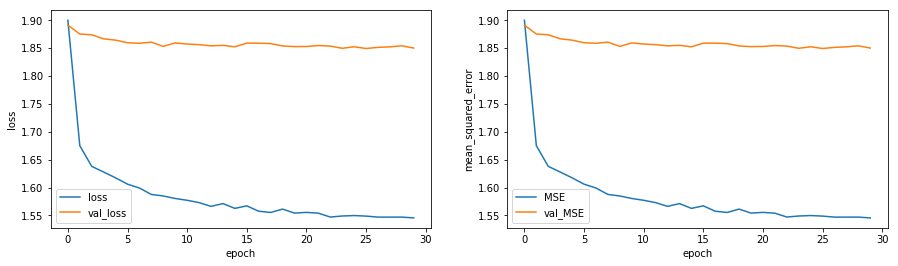

In [80]:
fig, axes = plt.subplots(figsize = (15,4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.subplot(1, 2, 2)
plt.plot(history.history['mean_squared_error'], label = 'MSE')
plt.plot(history.history['val_mean_squared_error'], label = 'val_MSE')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('mean_squared_error')
None

In [81]:
y_test.shape, y_pred.shape

((10543,), (10543, 1))

In [82]:
r2_score(y_test, y_pred)

0.032082576757693326

## Regression tf without embeddings

In [83]:
df = pd.read_csv('../input/jobsch3/jobcloud_features.csv', delimiter = ';', parse_dates = ['start_dt', 'end_dt'])

In [84]:
DAYS = 10 # 1, 10, or 30

In [85]:
#df['days'] = (df['end_dt'] - df['start_dt']).dt.days
#df = df.loc[df['days'] >= 30, :]

In [86]:
df.head()

,id,start_dt,end_dt,1d_view_cnt,10d_view_cnt,30d_view_cnt,package_id,industry_name,job_location,job_postal_code,contract_pct_from,contract_pct_to,title,month,weekday,dayofyear,days_online,pct_range,city,title_num_words,title_aggressive,title_female,title_percent,title_location,title_diploma,title_chief,title_prob_en,title_prob_de,title_prob_fr,title_lang
0,8501672,2018-10-25,2018-11-26,0.2372,0.4565,0.7327,B,Industrie diverse,Espace Mittelland,NaN,100,100,Softwarearchitekt / Projektmanager (m/w) - All...,October,Thursday,298,32,0,Other,12,0,1,0,0,0,0,0.0,0.999994,0.0,de
1,8501682,2018-10-25,2018-11-26,0.2883,0.5826,1.0991,B,Maschinen-/Anlagenbau,Region Biel,NaN,100,100,Prozessingenieur Lasertechnologie - Industrial...,October,Thursday,298,32,0,Other,6,0,0,0,0,0,0,0.0,0.999996,0.0,de
2,8570830,2018-11-26,2018-12-28,0.1982,0.8468,1.1532,B,Industrie diverse,Espace Mittelland,NaN,100,100,Softwarearchitekt / Projektmanager (m/w) - All...,November,Monday,330,32,0,Other,12,0,1,0,0,0,0,0.0,0.999994,0.0,de
3,8649301,2019-01-08,2019-02-08,0.2883,0.7177,1.4835,B,Maschinen-/Anlagenbau,Espace Mittelland,NaN,100,100,Projektleiter (m/w) - Werkzeug- oder Maschinenbau,January,Tuesday,8,31,0,Other,6,0,1,0,0,0,0,0.0,0.999995,0.0,de
4,8730602,2019-02-12,2019-02-21,0.3574,0.7297,0.7297,B,Industrie diverse,Region Biel,NaN,100,100,Fachverantwortlichen Metrologie - Produkteentw...,February,Tuesday,43,9,0,Other,6,0,0,0,0,0,0,0.0,0.999997,0.0,de


In [87]:
#df = df.iloc[:, [5] + list(range(6, 9)) + list(range(10, 12)) + list(range(17, 30))]; df.head()

In [88]:
df = df.loc[df['days_online'] >= DAYS]
features = ['contract_pct_from', 'contract_pct_to', 'month', 'package_id', 'industry_name',# 'days_online', 
            'city', 'title_num_words', 'title_aggressive', 'title_female', 'title_percent',
            'title_location', 'title_diploma', 'title_chief', 'title_prob_en',
            'title_prob_de', 'title_prob_fr']
X = pd.get_dummies(df[features], columns=['package_id', 'city', 'industry_name', 'month'])
y = df['%sd_view_cnt' % DAYS]

In [89]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [90]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((41972, 61), (20674, 61), (41972,), (20674,))

In [91]:
#x_train = tf.keras.utils.normalize(x_train.values)
#y_train = tf.keras.utils.normalize(y_train.values)
#x_test = tf.keras.utils.normalize(x_test.values)
#y_test = tf.keras.utils.normalize(y_test.values)

In [92]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(61, )),
  tf.keras.layers.Dense(50, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(50, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(1)
])

In [93]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mean_squared_error'])

In [94]:
history = model.fit(x_train, y_train, 
                    epochs=20, 
                    verbose = 0,
                    validation_split=0.2)


In [95]:
model.evaluate(x_test, y_test)

20674/20674 [==============================] - 0s 24us/sample - loss: 0.3541 - mean_squared_error: 0.3541


[0.35413783540304317, 0.35413778]

In [96]:
y_pred = model.predict(x_test)

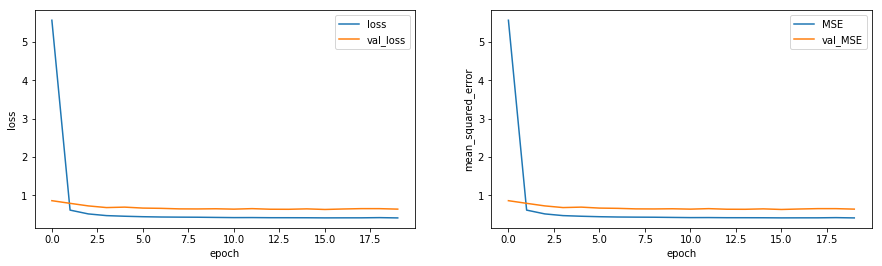

In [97]:
fig, axes = plt.subplots(figsize = (15,4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.subplot(1, 2, 2)
plt.plot(history.history['mean_squared_error'], label = 'MSE')
plt.plot(history.history['val_mean_squared_error'], label = 'val_MSE')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('mean_squared_error')
None

In [98]:
r2_score(y_test, model.predict(x_test))

0.19012581556641228

In [99]:
!pip install rfpimp

You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [100]:
y_pred.shape, y_test.shape

((20674, 1), (20674,))

In [101]:
from rfpimp import *

In [102]:
#x_test.head()

In [103]:
def importances(model, X_valid, y_valid, features=None, n_samples=5000, sort=True, metric=None, sample_weights = None):

    def flatten(features):
        all_features = set()
        for sublist in features:
            if isinstance(sublist, str):
                all_features.add(sublist)
            else:
                for item in sublist:
                    all_features.add(item)
        return all_features

    if features is None:
        # each feature in its own group
        features = X_valid.columns.values
    else:
        req_feature_set = flatten(features)
        model_feature_set = set(X_valid.columns.values)
        # any features left over?
        other_feature_set = model_feature_set.difference(req_feature_set)
        if len(other_feature_set) > 0:
            # if leftovers, we need group together as single new feature
            features.append(list(other_feature_set))

    X_valid, y_valid, sample_weights = sample(X_valid, y_valid, n_samples, sample_weights=sample_weights)
    X_valid = X_valid.copy(deep=False)  # we're modifying columns

    if callable(metric):
        baseline = metric(model, X_valid, y_valid, sample_weights)
    else:
        baseline = r2_score(y_valid, model.predict(X_valid))

    imp = []
    for group in features:
        if isinstance(group, str):
            save = X_valid[group].copy()
            X_valid[group] = np.random.permutation(X_valid[group])
            if callable(metric):
                m = metric(model, X_valid, y_valid, sample_weights)
            else:
                m = r2_score(y_valid, model.predict(X_valid)) #r2_score(y_test, model.predict(x_test))
            X_valid[group] = save
        else:
            save = {}
            for col in group:
                save[col] = X_valid[col].copy()
            for col in group:
                X_valid[col] = np.random.permutation(X_valid[col])

            if callable(metric):
                m = metric(model, X_valid, y_valid, sample_weights)
            else:
                m = r2_score(y_valid, model.predict(X_valid))
            for col in group:
                X_valid[col] = save[col]
        imp.append(baseline - m)

    # Convert and groups/lists into string column names
    labels = []
    for col in features:
        if isinstance(col, list):
            labels.append('\n'.join(col))
        else:
            labels.append(col)

    I = pd.DataFrame(data={'Feature': labels, 'Importance': np.array(imp)})
    I = I.set_index('Feature')
    if sort:
        I = I.sort_values('Importance', ascending=False)
    return I


In [104]:
x_test.shape, y_test.shape

((20674, 61), (20674,))

In [105]:
imp = importances(model, x_test, y_test)

In [106]:
impp = imp.reset_index()
impp.head(10)

,Feature,Importance
0,contract_pct_to,0.236005
1,contract_pct_from,0.130186
2,package_id_B,0.047561
3,package_id_D,0.033779
4,title_percent,0.031757
5,industry_name_öffentl. Verwaltung/ Verbände,0.024261
6,city_Zürich,0.014000
7,month_January,0.011727
8,title_diploma,0.011585
9,package_id_A,0.010130


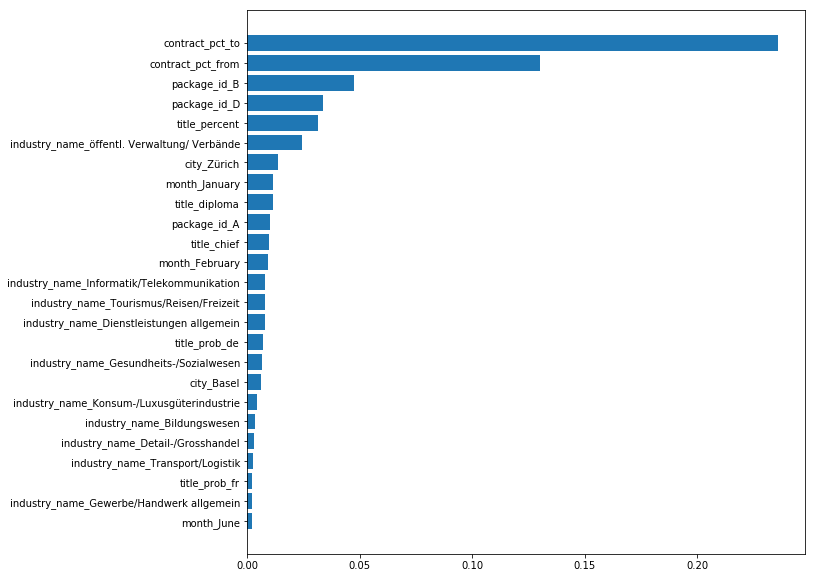

In [107]:
fig, ax = plt.subplots(figsize = (10, 10))
plt.barh(impp.sort_values('Importance')['Feature'][-25:], impp.sort_values('Importance')['Importance'][-25:])
None

## Regression tf with embeddings and other vars

In [108]:
df = pd.read_csv('../input/jobsch3/jobcloud_features.csv', delimiter = ';', parse_dates = ['start_dt', 'end_dt'])

In [109]:
df = pd.concat([df, dfv], axis = 1)

In [110]:
df.shape

(101735, 80)

In [111]:
df.columns

Index(['id', 'start_dt', 'end_dt', '1d_view_cnt', '10d_view_cnt',
       '30d_view_cnt', 'package_id', 'industry_name', 'job_location',
       'job_postal_code', 'contract_pct_from', 'contract_pct_to', 'title',
       'month', 'weekday', 'dayofyear', 'days_online', 'pct_range', 'city',
       'title_num_words', 'title_aggressive', 'title_female', 'title_percent',
       'title_location', 'title_diploma', 'title_chief', 'title_prob_en',
       'title_prob_de', 'title_prob_fr', 'title_lang', '0', '1', '2', '3', '4',
       '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17',
       '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29',
       '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41',
       '42', '43', '44', '45', '46', '47', '48', '49'],
      dtype='object')

In [112]:
DAYS = 10

In [113]:
df = df.loc[df['days_online'] >= DAYS]
features = ['contract_pct_from', 'contract_pct_to', 'month', 'package_id', 'industry_name',# 'days_online', 
            'city', 'title_num_words', 'title_aggressive', 'title_female', 'title_percent',
            'title_location', 'title_diploma', 'title_chief', 'title_prob_en',
            'title_prob_de', 'title_prob_fr']
embeddings = [str(x) for x in range(50)]
X = pd.get_dummies(df.loc[:, features + embeddings], columns=['package_id', 'city', 'industry_name', 'month'])
y = df['%sd_view_cnt' % DAYS]

In [114]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [115]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((41972, 111), (20674, 111), (41972,), (20674,))

In [116]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(111, )),
  tf.keras.layers.Dense(100, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(1)
])

In [117]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mean_squared_error'])

In [118]:
history = model.fit(x_train, y_train, 
                    epochs=10, 
                    verbose = 0,
                    validation_split=0.2)

In [119]:
model.evaluate(x_test, y_test)

20674/20674 [==============================] - 1s 32us/sample - loss: 0.3435 - mean_squared_error: 0.3435


[0.34346275880631527, 0.3434627]

In [120]:
y_pred = model.predict(x_test)

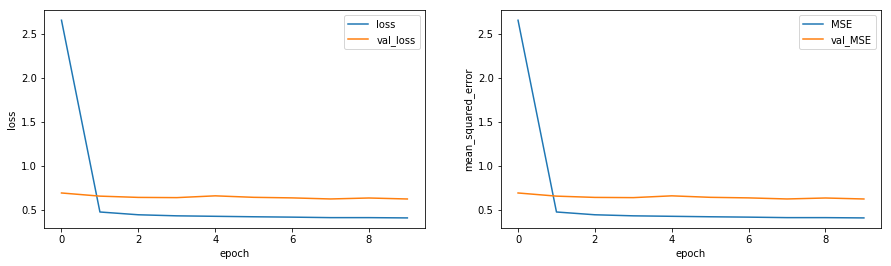

In [121]:
fig, axes = plt.subplots(figsize = (15,4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.subplot(1, 2, 2)
plt.plot(history.history['mean_squared_error'], label = 'MSE')
plt.plot(history.history['val_mean_squared_error'], label = 'val_MSE')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('mean_squared_error')
None

In [122]:
r2_score(y_test, model.predict(x_test))

0.21453854010204154

In [123]:
imp = importances(model, x_test, y_test)

In [124]:
impp = imp.reset_index()
impp.head(50)

,Feature,Importance
0,contract_pct_from,0.135776
1,package_id_B,0.042162
2,contract_pct_to,0.029201
3,title_percent,0.023538
4,package_id_D,0.023167
5,package_id_A,0.020108
6,month_January,0.019151
7,title_num_words,0.017525
8,industry_name_öffentl. Verwaltung/ Verbände,0.016065
9,title_diploma,0.011933


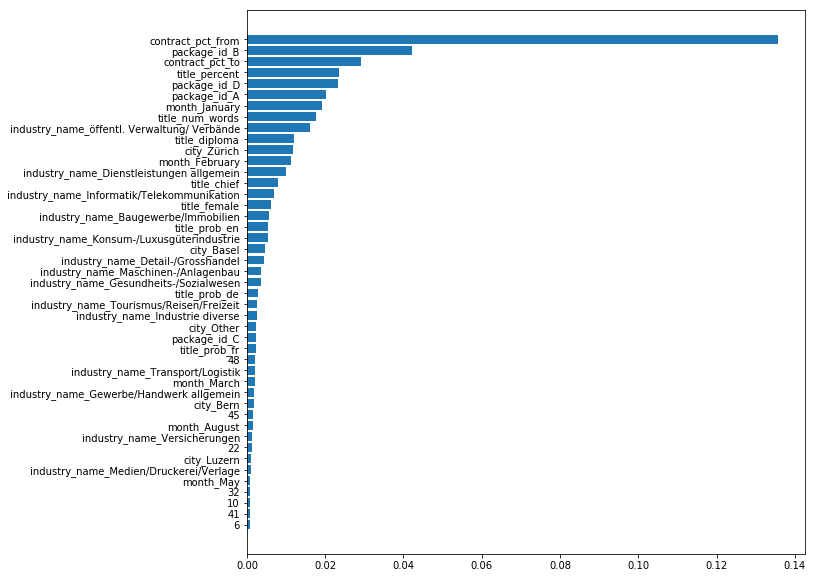

In [125]:
fig, ax = plt.subplots(figsize = (10, 10))
plt.barh(impp.sort_values('Importance')['Feature'][-45:], impp.sort_values('Importance')['Importance'][-45:])
None